### Import useful modules

In [1]:
import pandas as pd # dataframes
import numpy as np # numerical library
import seaborn as sns # advanced plotting library
from matplotlib import pyplot as plt # plotting library
%matplotlib inline
# need this in order to display plots in notebook

### Load data

In [2]:
DATA_PATH = '/root/src/data/'

In [3]:
df_transactions = pd.read_csv(DATA_PATH + 'transactions.csv', parse_dates=['date'], dtype={'store_nbr':np.uint32, 'transactions':np.uint32})

### What does the data look like?

In [4]:
df_transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


### Nulls in data? Nup!

In [5]:
print("Nulls in columns: {0} => {1}".format(df_transactions.columns.values, df_transactions.isnull().any().values))

Nulls in columns: ['date' 'store_nbr' 'transactions'] => [False False False]


### Focus on one store

In [6]:
def get_transactions_for_store(df, store_num):
    return df[df['store_nbr'] == store_num].set_index('date')[['transactions']]

In [7]:
df_transactions_store_25 = get_transactions_for_store(df_transactions, 25)
df_transactions_store_25.head()

,transactions
date,
2013-01-01,770
2013-01-02,1038
2013-01-03,887
2013-01-04,1054
2013-01-05,1355


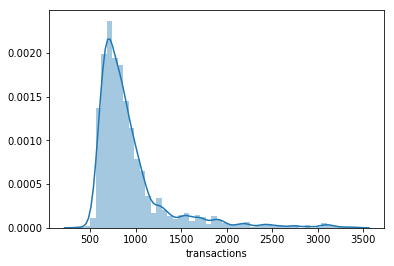

In [8]:
sns.distplot(df_transactions_store_25['transactions']);

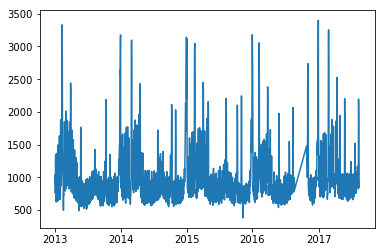

In [9]:
plt.plot(df_transactions_store_25['transactions'])

### Not sure what to make of this, other than there looks to be a positive skew and seasonal trend (probably holidays)

### Focus on one year at a time

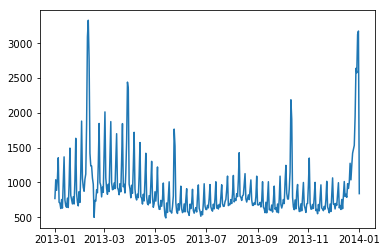

In [10]:
year_2013 = (df_transactions_store_25.index >= '2013') & (df_transactions_store_25.index <= '2014')
df_transactions_store_25_year_2013 = df_transactions_store_25[year_2013]
df_transactions_store_25_year_2013.columns = ['2013']
plt.plot(df_transactions_store_25_year_2013)

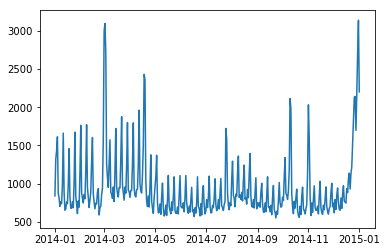

In [11]:
year_2014 = (df_transactions_store_25.index >= '2014') & (df_transactions_store_25.index <= '2015')
df_transactions_store_25_year_2014 = df_transactions_store_25[year_2014]
df_transactions_store_25_year_2014.columns = ['2014']
plt.plot(df_transactions_store_25_year_2014)

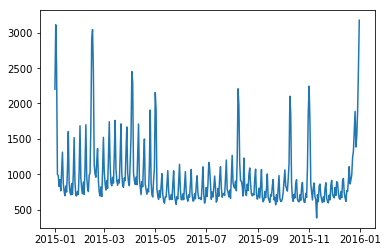

In [12]:
year_2015 = (df_transactions_store_25.index >= '2015') & (df_transactions_store_25.index <= '2016')
df_transactions_store_25_year_2015 = df_transactions_store_25[year_2015]
df_transactions_store_25_year_2015.columns = ['2015']
plt.plot(df_transactions_store_25_year_2015)

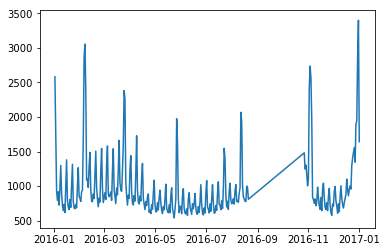

In [13]:
year_2016 = (df_transactions_store_25.index >= '2016') & (df_transactions_store_25.index <= '2017')
df_transactions_store_25_year_2016 = df_transactions_store_25[year_2016]
df_transactions_store_25_year_2016.columns = ['2016']
plt.plot(df_transactions_store_25_year_2016)

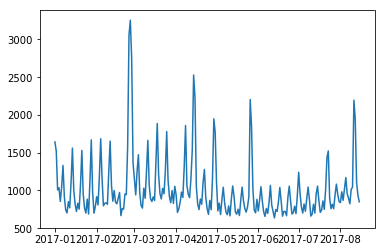

In [14]:
year_2017 = (df_transactions_store_25.index >= '2017') & (df_transactions_store_25.index <= '2018')
df_transactions_store_25_year_2017 = df_transactions_store_25[year_2017]
df_transactions_store_25_year_2017.columns = ['2017']
plt.plot(df_transactions_store_25_year_2017)

### Overlay plots

In [15]:
%%capture
df_transactions_store_25_year_2013['month'] = df_transactions_store_25_year_2013.index.to_series().dt.strftime('%b');
df_transactions_store_25_year_2014['month'] = df_transactions_store_25_year_2014.index.to_series().dt.strftime('%b');
df_transactions_store_25_year_2015['month'] = df_transactions_store_25_year_2015.index.to_series().dt.strftime('%b');
df_transactions_store_25_year_2016['month'] = df_transactions_store_25_year_2016.index.to_series().dt.strftime('%b');
df_transactions_store_25_year_2017['month'] = df_transactions_store_25_year_2017.index.to_series().dt.strftime('%b');

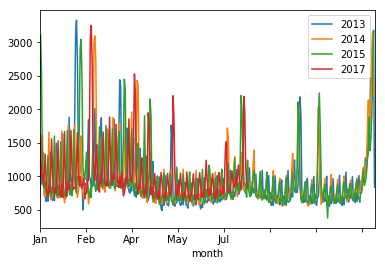

In [16]:
ax = df_transactions_store_25_year_2013.plot(x='month')
ax = df_transactions_store_25_year_2014.plot(x='month', ax=ax)
ax = df_transactions_store_25_year_2015.plot(x='month', ax=ax)
#ax = df_transactions_store_25_year_2016.plot(x='month', ax=ax)
ax = df_transactions_store_25_year_2017.plot(x='month', ax=ax)

### There was an issue with 2016 so I left it out

### Need to investigate Sep/Oct 2016